# Welcome to pyLIMA tutorial! #

We gonna see how to fit parallax.


In [1]:
### First import the required libraries
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import os, sys
lib_path = os.path.abspath(os.path.join('../'))
sys.path.append(lib_path)

from pyLIMA import event
from pyLIMA import telescopes
from pyLIMA import microlmodels

In [2]:
### Create an event object. You can choose the name and RA,DEC in degrees :

your_event = event.Event()
your_event.name = 'your choice'

#Here RA DEC matters !! 
your_event.ra = 266.25624999999997

your_event.dec = -22.261972222222223


## Now we need some observations. That's good, we obtain some data on two
### telescopes. Both are in I band and magnitude units :

data_1 = np.loadtxt('./Survey_parallax.dat')
telescope_1 = telescopes.Telescope(name='OGLE', camera_filter='I', light_curve_magnitude=data_1)

### Add the telescopes to your event :
your_event.telescopes.append(telescope_1)



### Sanity check
your_event.check_event()

### Construct the model you want to fit. Let's go basic with a PSPL, without second_order effects :
model_1 = microlmodels.create_model('PSPL', your_event)


('check_event', ' : Everything looks fine, this event can be fitted')



Start fit on your choice, with model PSPL and method LM
('check_event', ' : Everything looks fine, this event can be fitted')
('initial_guess', ' : Initial parameters guess SUCCESS')
('lmarquardt', ' : Levenberg_marquardt fit SUCCESS')
[2457435.791263075, 0.0102655010582999, 205.8998360159986, 908.2654869602992, 1804.6959880321087, 1851.3480531993375]


<IPython.core.display.Javascript object>


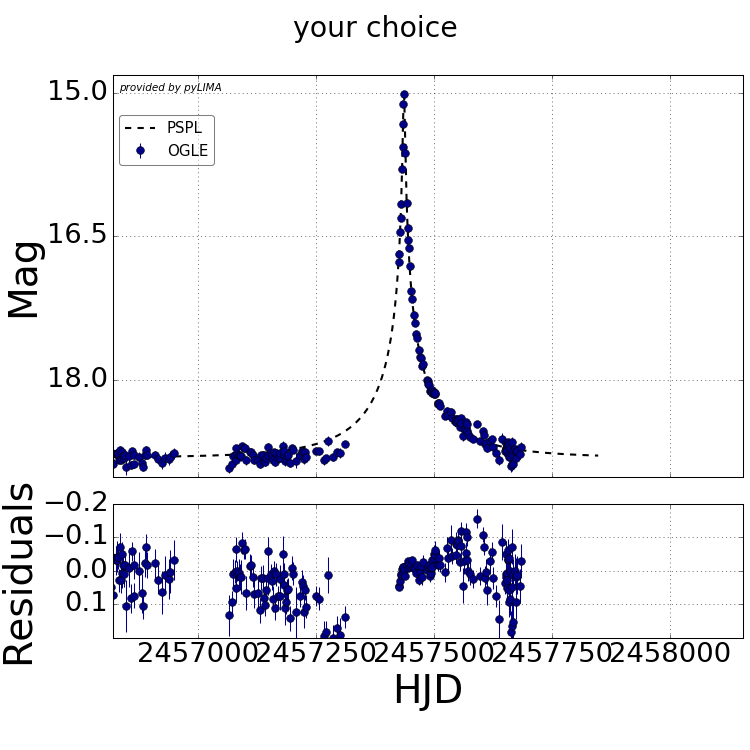

<IPython.core.display.Javascript object>


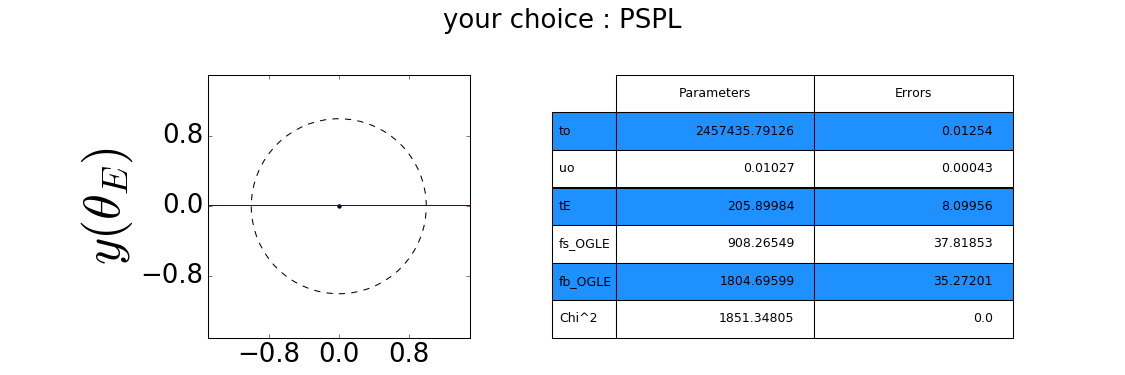

Chi2_LM : 1851.3480532


In [3]:
### Let's try with the simplest Levenvberg_Marquardt algorithm :
your_event.fit(model_1,'LM')

### Let's see some plots.
your_event.fits[0].produce_outputs()
print 'Chi2_LM :',your_event.fits[0].outputs.fit_parameters.chichi
plt.show()


Parallax(Full) estimated for the telescope OGLE: SUCCESS

Start fit on your choice, with model PSPL and method LM
('check_event', ' : Everything looks fine, this event can be fitted')
('initial_guess', ' : Initial parameters guess SUCCESS')
('lmarquardt', ' : Levenberg_marquardt fit SUCCESS')
[2457372.6568948035, 0.030152508960366912, 150.82416277169244, 0.00856418693460815, -0.17311790548758124, 1749.9140719268787, 966.3378069905708, 1427.4780200035568]


<IPython.core.display.Javascript object>


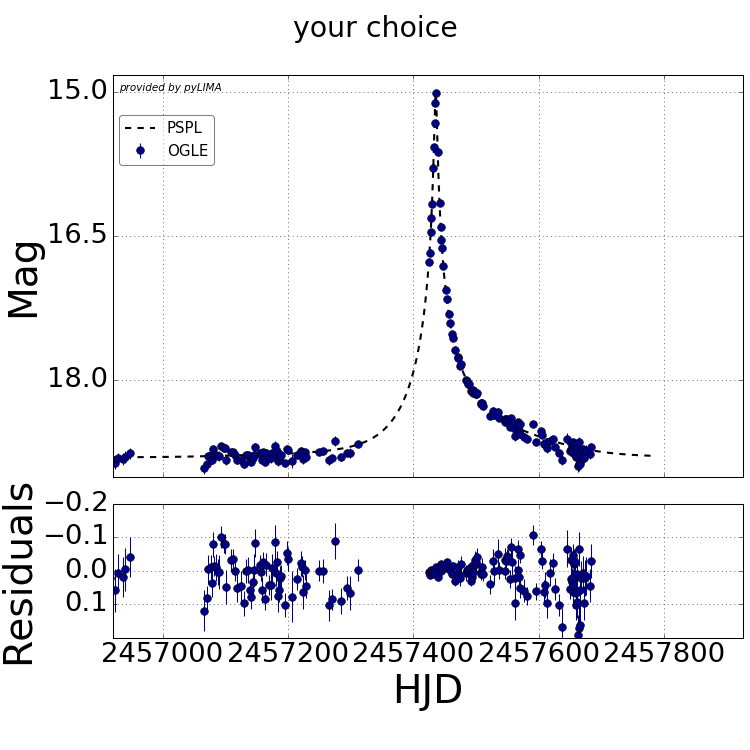

Parallax(Full) estimated for the telescope OGLE: SUCCESS


<IPython.core.display.Javascript object>


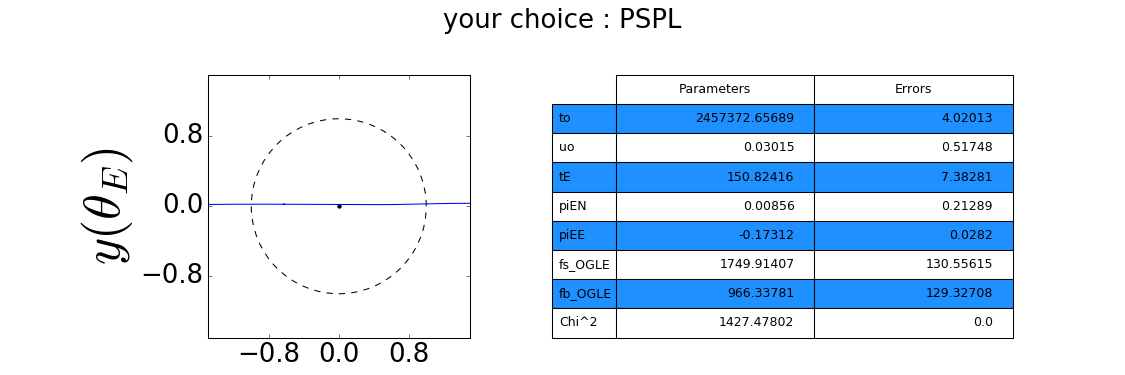

Parallax(Full) estimated for the telescope OGLE: SUCCESS
Chi2_LM : 1427.47802


In [4]:
### looks to be some residuals on the event wings, maybe parallax.
### Lets try, you have to choose topar, the parallax time reference. Here we choose 2457850.
model_2 = microlmodels.create_model('PSPL', your_event,parallax=['Full',2457850])

# we can speed up computation, by adding guess from last fit :

#################### guess =   [to,uo,tE]                                + [piEN,piEE]  
model_2.parameters_guess = your_event.fits[0].fit_results[:3]+[0,0]

your_event.fit(model_2,'LM')

### Let's see some plots.
your_event.fits[-1].produce_outputs()
print 'Chi2_LM :',your_event.fits[-1].outputs.fit_parameters.chichi
plt.show()



Start fit on your choice, with model PSPL and method DE
('check_event', ' : Everything looks fine, this event can be fitted')
differential_evolution step 1: f(x)= 578105
differential_evolution step 2: f(x)= 578105
differential_evolution step 3: f(x)= 578105
differential_evolution step 4: f(x)= 562042
differential_evolution step 5: f(x)= 562042
differential_evolution step 6: f(x)= 547820
differential_evolution step 7: f(x)= 547820
differential_evolution step 8: f(x)= 369118
differential_evolution step 9: f(x)= 369118
differential_evolution step 10: f(x)= 282774
differential_evolution step 11: f(x)= 282774
differential_evolution step 12: f(x)= 221708
differential_evolution step 13: f(x)= 221708
differential_evolution step 14: f(x)= 201907
differential_evolution step 15: f(x)= 201907
differential_evolution step 16: f(x)= 201907
differential_evolution step 17: f(x)= 97246.2
differential_evolution step 18: f(x)= 97246.2
differential_evolution step 19: f(x)= 97246.2
differential_evolution s

<IPython.core.display.Javascript object>


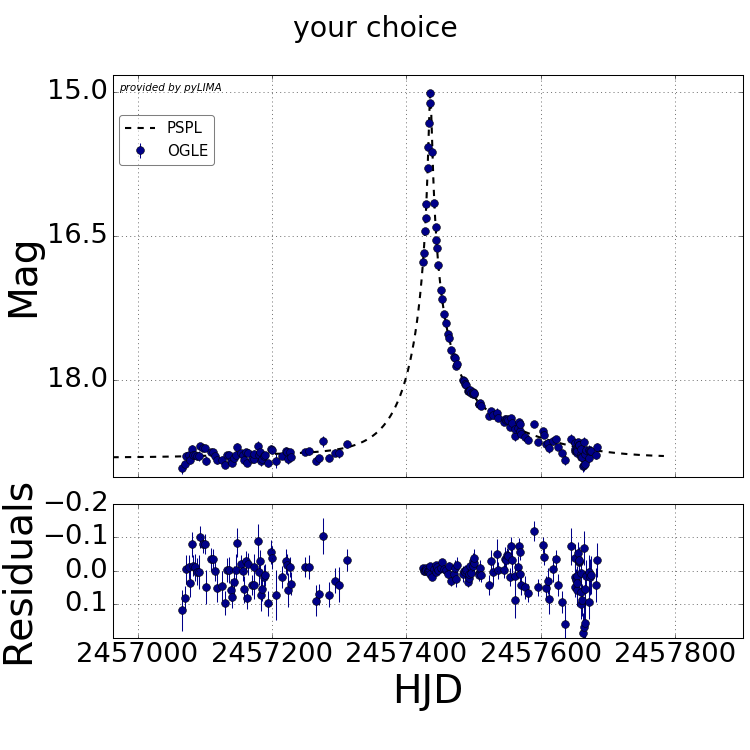

Parallax(Full) estimated for the telescope OGLE: SUCCESS


<IPython.core.display.Javascript object>


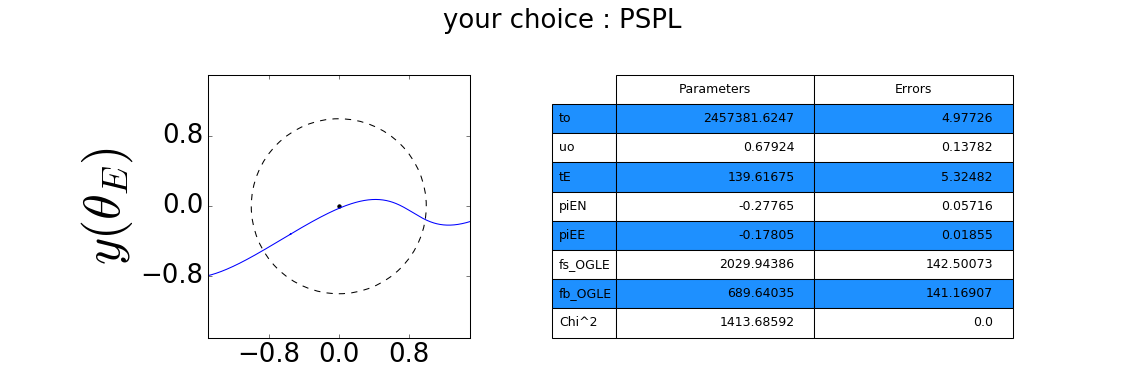

Parallax(Full) estimated for the telescope OGLE: SUCCESS
Chi2_LM : 1413.68592443


In [5]:
### That looks better! We can check with DE!
your_event.fit(model_2,'DE',DE_population_size=5)

### Let's see some plots.
your_event.fits[-1].produce_outputs()
print 'Chi2_LM :',your_event.fits[-1].outputs.fit_parameters.chichi
plt.show()


In [16]:
### What about Space based parallax? Lets have a look to OB150966 :
### http://adsabs.harvard.edu/abs/2016ApJ...819...93S



your_event = event.Event()
your_event.name = 'OB150966'

#Here RA DEC matters !! 
your_event.ra = 268.75425

your_event.dec = -29.047


## Now we need some observations. That's good, we obtain some data on two
### telescopes. Both are in I band and magnitude units :

data_1 = np.loadtxt('./OGLE_OB150966.dat')
telescope_1 = telescopes.Telescope(name='OGLE', camera_filter='I', light_curve_magnitude=data_1)

data_2 = np.loadtxt('./SPITZER_OB150966.dat')
telescope_2 = telescopes.Telescope(name='SPITZER', camera_filter='IRAC1', light_curve_magnitude=data_2)
telescope_2.location='Space'
telescope_2.spacecraft_name  = 'Spitzer'
### Add the telescopes to your event :
your_event.telescopes.append(telescope_1)
your_event.telescopes.append(telescope_2)



### Sanity check
your_event.check_event()

### Construct the model you want to fit. Let's go basic with a PSPL, without second_order effects :
model_1 = microlmodels.create_model('PSPL', your_event)


('check_event', ' : Everything looks fine, this event can be fitted')



Start fit on OB150966, with model PSPL and method LM
('check_event', ' : Everything looks fine, this event can be fitted')
('initial_guess', ' : Initial parameters guess SUCCESS')
('lmarquardt', ' : Levenberg_marquardt fit SUCCESS')
[2457205.228794611, 0.015581055154901508, 58.45276492403197, 1309.166988225647, -59.22963168556619, -437.6471308248929, 40631.148384164364, 55929.501680044734]
Your fit probably wrong. Cause ==> negative source flux for telescope SPITZER
We have to change method, this fit was unsuccessfull. We decided to switch method to "DE"


<IPython.core.display.Javascript object>


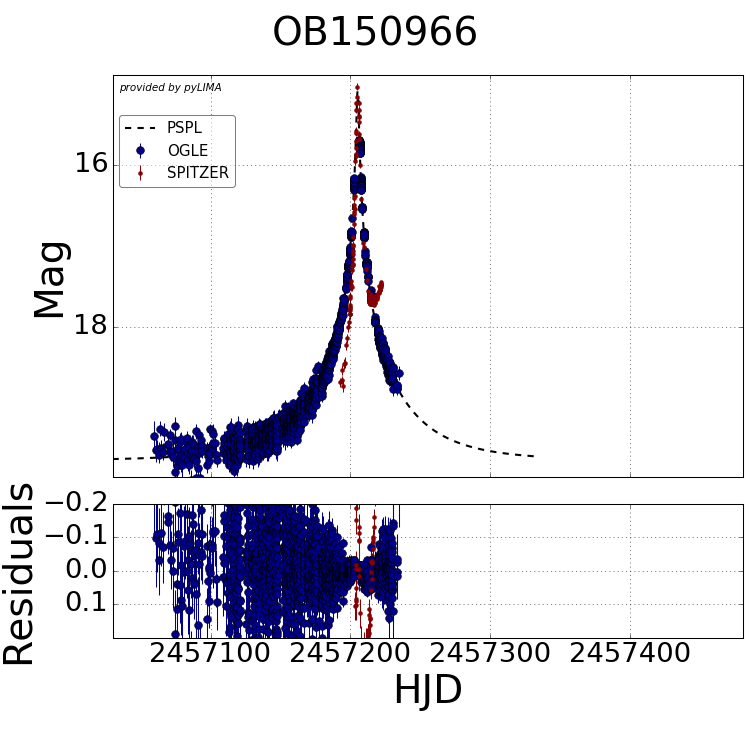

<IPython.core.display.Javascript object>


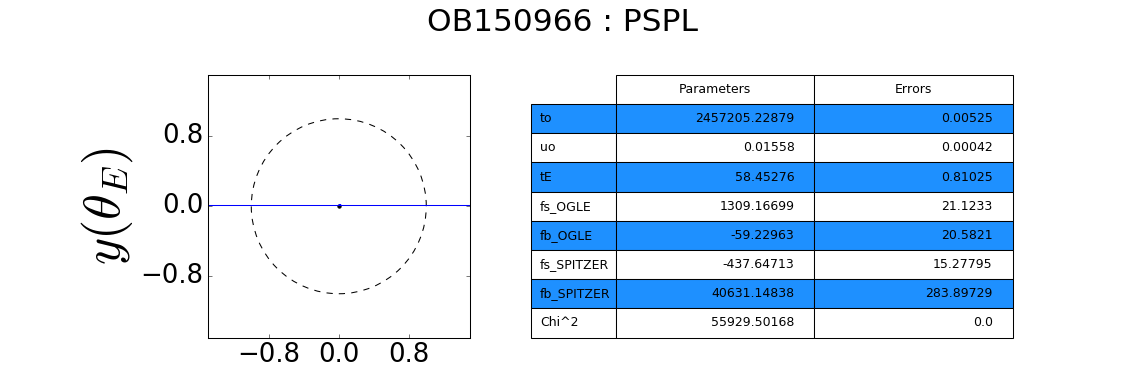

Chi2_LM : 55929.50168


In [17]:
### Let's try with the simplest Levenvberg_Marquardt algorithm :
your_event.fit(model_1,'LM')


### Let's see some plots.
your_event.fits[-1].produce_outputs()
print 'Chi2_LM :',your_event.fits[-1].outputs.fit_parameters.chichi
plt.show()


Start fit on OB150966, with model PSPL and method DE
('check_event', ' : Everything looks fine, this event can be fitted')
differential_evolution step 1: f(x)= 2.09955e+06
differential_evolution step 2: f(x)= 2.09955e+06
differential_evolution step 3: f(x)= 2.09955e+06
differential_evolution step 4: f(x)= 2.09955e+06
differential_evolution step 5: f(x)= 1.74469e+06
differential_evolution step 6: f(x)= 1.74469e+06
differential_evolution step 7: f(x)= 1.74469e+06
differential_evolution step 8: f(x)= 1.74469e+06
differential_evolution step 9: f(x)= 1.74469e+06
differential_evolution step 10: f(x)= 1.74469e+06
differential_evolution step 11: f(x)= 1.74469e+06
differential_evolution step 12: f(x)= 1.74469e+06
differential_evolution step 13: f(x)= 1.74469e+06
differential_evolution step 14: f(x)= 1.74102e+06
differential_evolution step 15: f(x)= 1.69319e+06
differential_evolution step 16: f(x)= 1.69319e+06
differential_evolution step 17: f(x)= 1.69319e+06
differential_evolution step 18: f(x

<IPython.core.display.Javascript object>


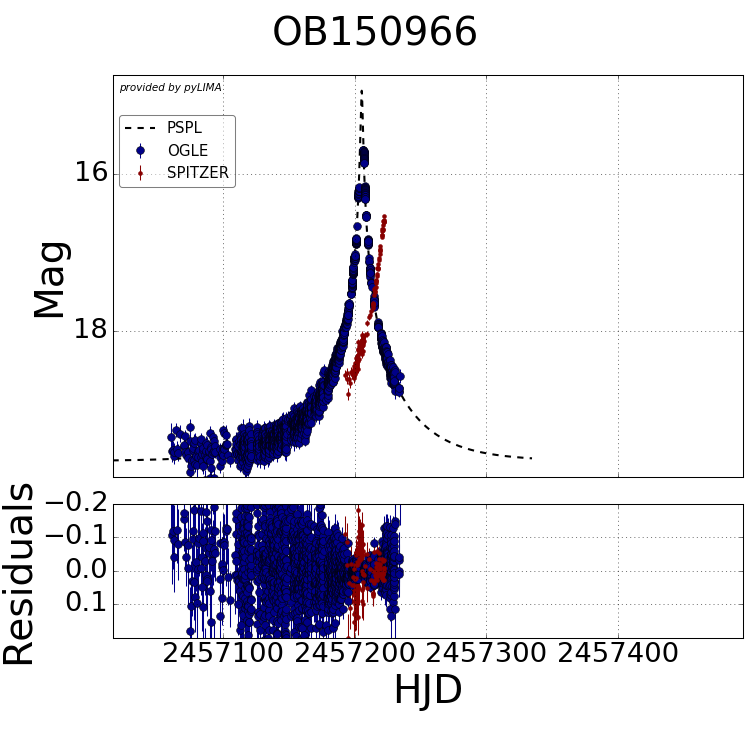

Parallax(Full) estimated for the telescope OGLE: SUCCESS


<IPython.core.display.Javascript object>


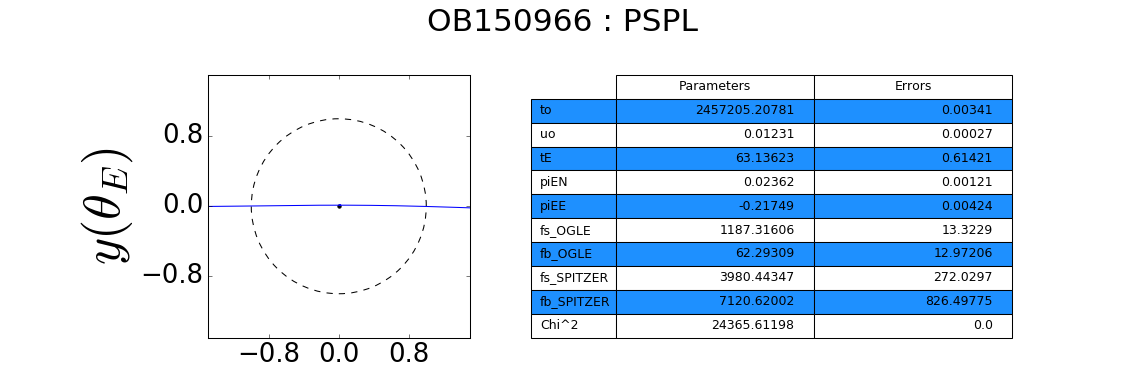

Parallax(Full) estimated for the telescope OGLE: SUCCESS
Chi2_LM : 24365.6119812


In [19]:
### Of course, not great at all! :

### Construct the model with parallax centered at 2457205:
model_2 = microlmodels.create_model('PSPL', your_event,parallax=['Full',2457205])
your_event.fit(model_2,'DE')


### Let's see some plots.
your_event.fits[-1].produce_outputs()
print 'Chi2_LM :',your_event.fits[-1].outputs.fit_parameters.chichi
plt.show()

In [15]:
# Street et al. found piE =(0.0234, -0.238), close to your fit in principle.


0 Earth
